In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.patches import Rectangle
from astropy.io import fits
from os import listdir
from os.path import join, isfile, expandvars

caldb = '/home/dipiano/caldb/data/cta/prod5'
f_z20 = join(caldb, 'Prod5-North-20deg-AverageAz-4LSTs.1800s-v0.1.fits')
f_z40 = join(caldb, 'Prod5-North-40deg-AverageAz-4LSTs.1800s-v0.1.fits')
f_z60 = join(caldb, 'Prod5-North-60deg-AverageAz-4LSTs.1800s-v0.1.fits')

with fits.open(f_z20) as z20:
        #print(z20.info())
        #print(z20['BACKGROUND'].header)
        b20 = z20['BACKGROUND'].data.field(6)
        print(b20.max(), b20.min())
with fits.open(f_z40) as z40:
        b40 = z40['BACKGROUND'].data.field(6)
        print(b40.max(), b40.min())
with fits.open(f_z60) as z60:
        b60 = z60['BACKGROUND'].data.field(6)
        print(b60.max(), b60.min())        

4.777277 0.0
1.882063 0.0
0.18088248 0.0


In [2]:
with fits.open(f_z20) as z20:
        #print(z20.info())
        #print(z20['EFFECTIVE AREA'].header)
        a20 = z20['EFFECTIVE AREA'].data.field(4)
        print(a20.max(), a20.min())
with fits.open(f_z40) as z40:
        a40 = z40['EFFECTIVE AREA'].data.field(4)
        print(a40.max(), a40.min())
with fits.open(f_z60) as z60:
        a60 = z60['EFFECTIVE AREA'].data.field(4)
        print(a60.max(), a60.min())        

401075.38 0.0
635776.9 0.0
1206518.9 0.0


In [3]:
figsize = (10, 10)
fontsize = 16
alpha = 0.5
c = ['blue', 'magenta', 'green', 'red', 'orange', 'maroon']
linestyle = [(0, ()), (0, (1, 3)), (0, (5, 5)), (0, (5, 2)),
             (0, (3, 5, 1, 5)), (0, (3, 1, 1, 1)), 
             (0, (3, 3, 1, 3, 1, 3)), (0, (3, 1, 1, 1, 1, 1))]

def get_aeff(irf):
    extension = 'EFFECTIVE AREA'
    field = 4
    with fits.open(irf) as hdul:
        elo = np.array(hdul[extension].data.field(0)[:].astype(float)[0])
        ehi = np.array(hdul[extension].data.field(1)[:].astype(float)[0])
        e = elo + 0.5*(ehi - elo)
        tlo = np.array(hdul[extension].data.field(2)[:].astype(float)[0])
        thi = np.array(hdul[extension].data.field(3)[:].astype(float)[0])
        theta = tlo + 0.5*(thi - tlo)
        aeff = np.array(hdul[extension].data.field(field)[:].astype(float)[0])
    return aeff, theta, e

def get_bkg(irf):
    extension = 'BACKGROUND'
    field = 6
    with fits.open(irf) as hdul:
        elo = np.array(hdul[extension].data.field(0)[:].astype(float)[0])
        ehi = np.array(hdul[extension].data.field(1)[:].astype(float)[0])
        e = elo + 0.5*(ehi - elo)
        xlo = np.array(hdul[extension].data.field(2)[:].astype(float)[0])
        xhi = np.array(hdul[extension].data.field(3)[:].astype(float)[0])
        x = xlo + 0.5*(xhi - xlo)
        ylo = np.array(hdul[extension].data.field(4)[:].astype(float)[0])
        yhi = np.array(hdul[extension].data.field(5)[:].astype(float)[0])
        y = ylo + 0.5*(yhi - ylo)
        bkg = np.array(hdul[extension].data.field(field)[:].astype(float)[0])
    return bkg, x, y, e

(60, 60, 21) (60,) (60,) (21,)


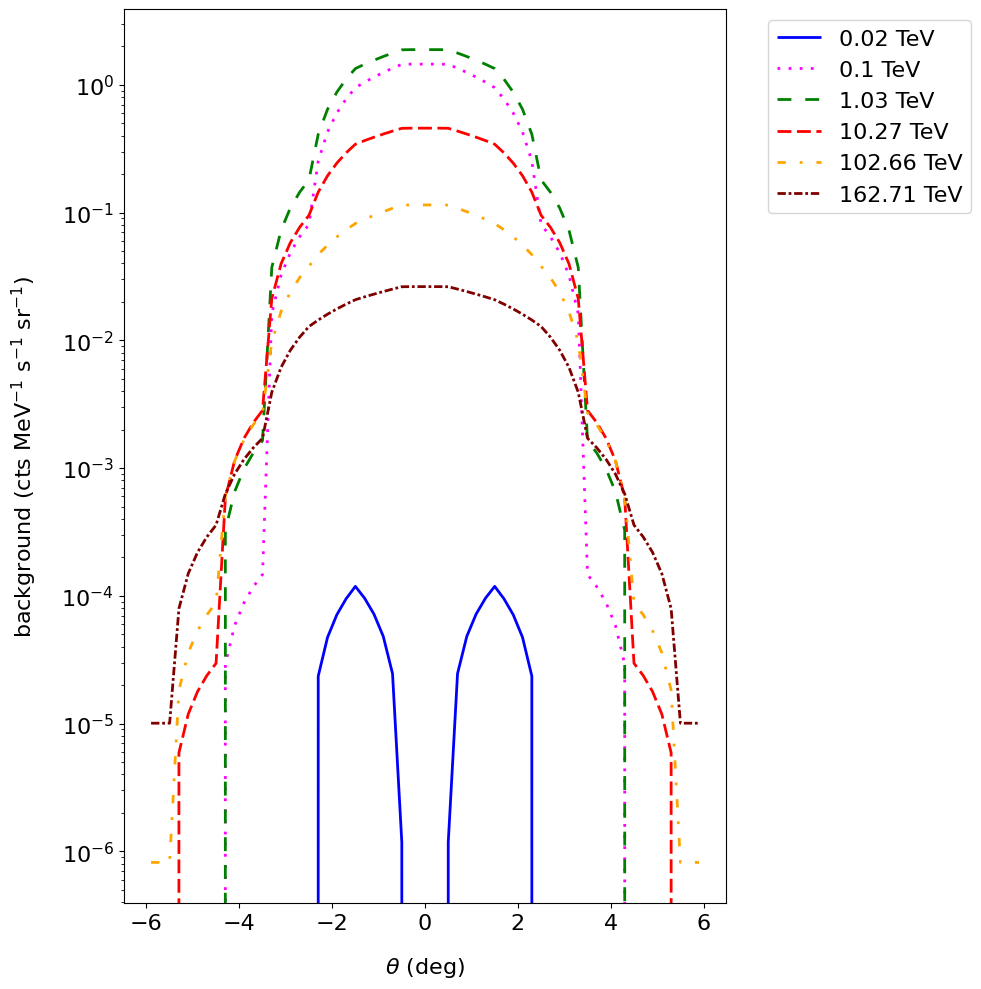

In [4]:
# BACKGROUND
bkg, x, y, e = get_bkg(f_z20)
print(bkg.shape, x.shape, y.shape, e.shape)

labels = [str(np.round(en, 2)) for en in e]
c = ['blue', 'magenta', 'green', 'red', 'orange', 'maroon']
ebins = [0, 4, 9, 14, 19, 20]

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, yscale='log') 
plt.xticks(fontsize=fontsize, rotation=0)
plt.yticks(fontsize=fontsize, rotation=0)

curve = []
for i, en in enumerate(ebins):
    Y = bkg[30,:,i]
    ax.plot(x, Y, label=f'{labels[en]} TeV', ls=linestyle[i], lw=2, color=c[i])
ax.set_xlabel(r'$\theta$ (deg)', fontsize=fontsize, labelpad=fontsize)
ax.set_ylabel('background (cts MeV$^{-1}$ s$^{-1}$ sr$^{-1}$)', fontsize=fontsize, labelpad=fontsize)
ax.legend(fontsize=fontsize, bbox_to_anchor=(1.05, 1.0), loc='upper left') 
plt.tight_layout()
fig.savefig('irfs/bkg_z20.png')
plt.show() 
plt.close()

(6, 42) (6,) (42,)


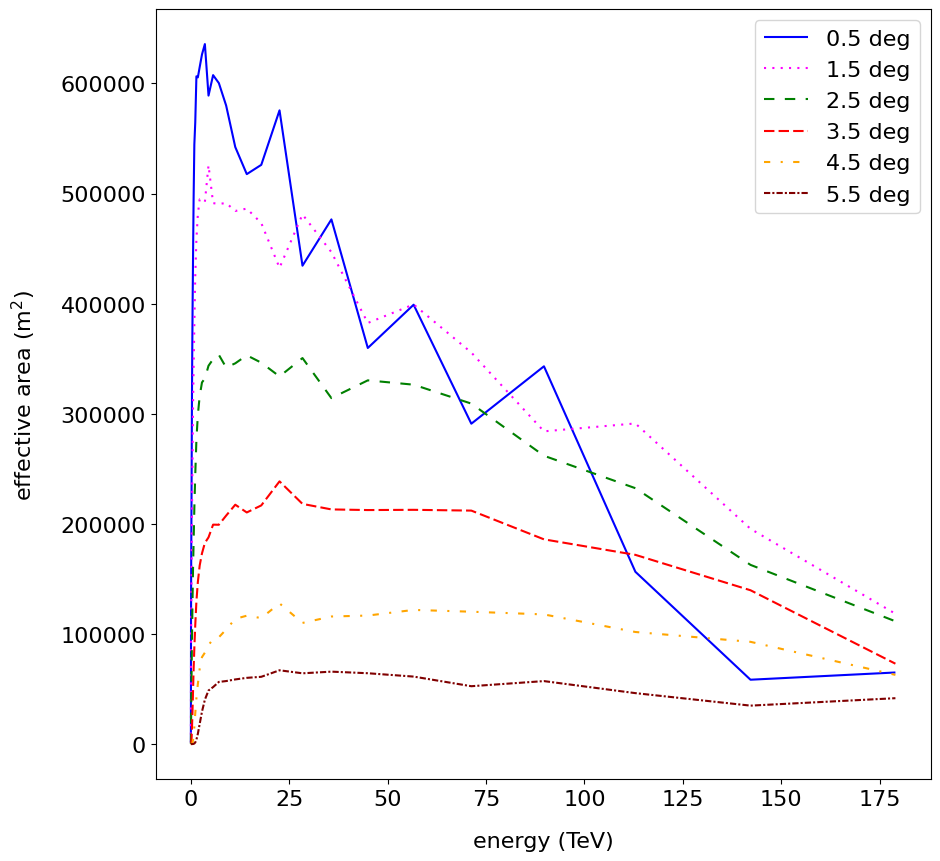

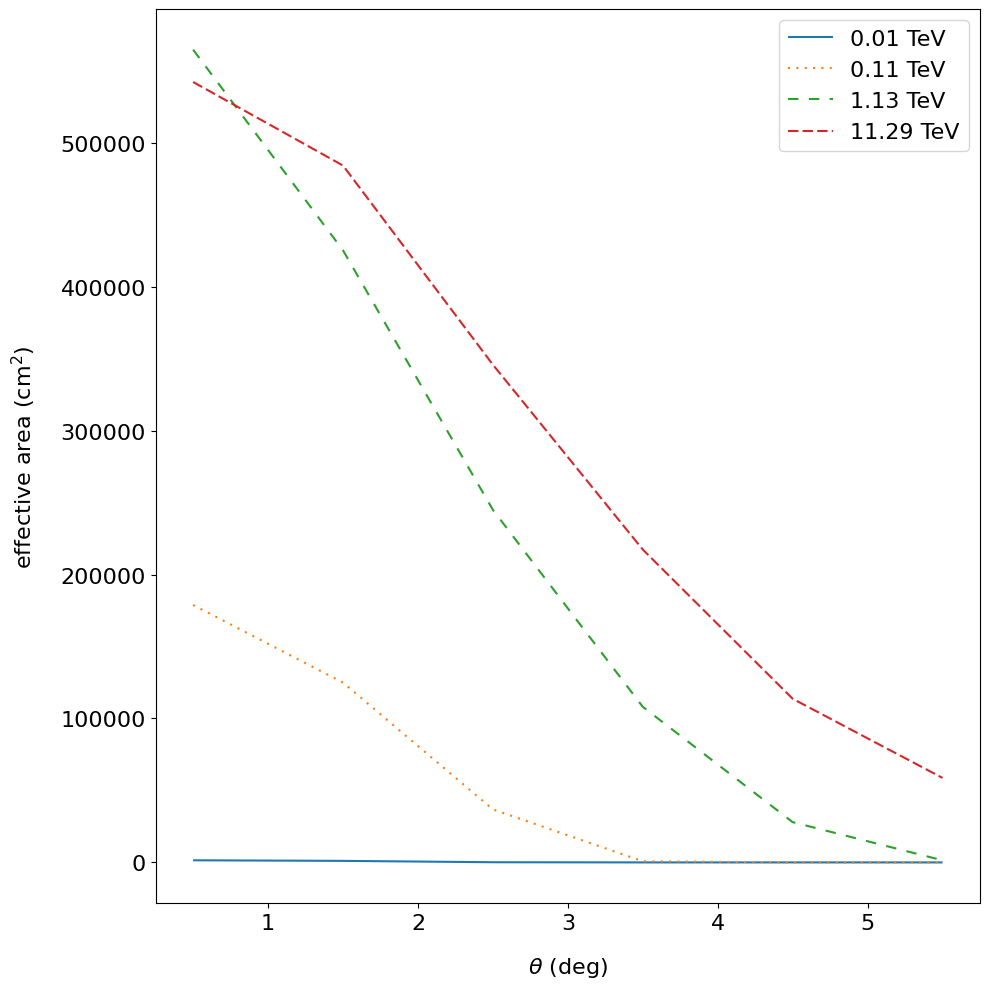

In [5]:
# EFFECTIVE AREA
aeff, theta, e = get_aeff(f_z20)
print(aeff.shape, theta.shape, e.shape)

le = [str(np.round(en, 2)) for en in e]
lt = [str(np.round(th, 2)) for th in theta]

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
plt.xticks(fontsize=fontsize, rotation=0)
plt.yticks(fontsize=fontsize, rotation=0)

for i in range(6):
    ax.plot(e, aeff[i,:], label=f'{lt[i]} deg', ls=linestyle[i], color=c[i])
ax.set_xlabel('energy (TeV)', fontsize=fontsize, labelpad=fontsize)
ax.set_ylabel(r'effective area (m$^2$)', fontsize=fontsize, labelpad=fontsize)
ax.legend(fontsize=fontsize) 
fig.savefig('irfs/aeff_e_z20.png')
plt.show() 
plt.close()

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
plt.xticks(fontsize=fontsize, rotation=0)
plt.yticks(fontsize=fontsize, rotation=0)

ebins = [0, 9, 19, 29]
for i, en in enumerate(ebins):
    ax.plot(theta, aeff[:,en], label=f'{le[en]} TeV', ls=linestyle[i])
ax.set_xlabel(r'$\theta$ (deg)', fontsize=fontsize, labelpad=fontsize)
ax.set_ylabel(r'effective area (cm$^2$)', fontsize=fontsize, labelpad=fontsize)
ax.legend(loc=0, fontsize=fontsize) 
plt.tight_layout()
fig.savefig('irfs/aeff_tetha_z20.png')
plt.show() 
plt.close()

# Comparison

10.27


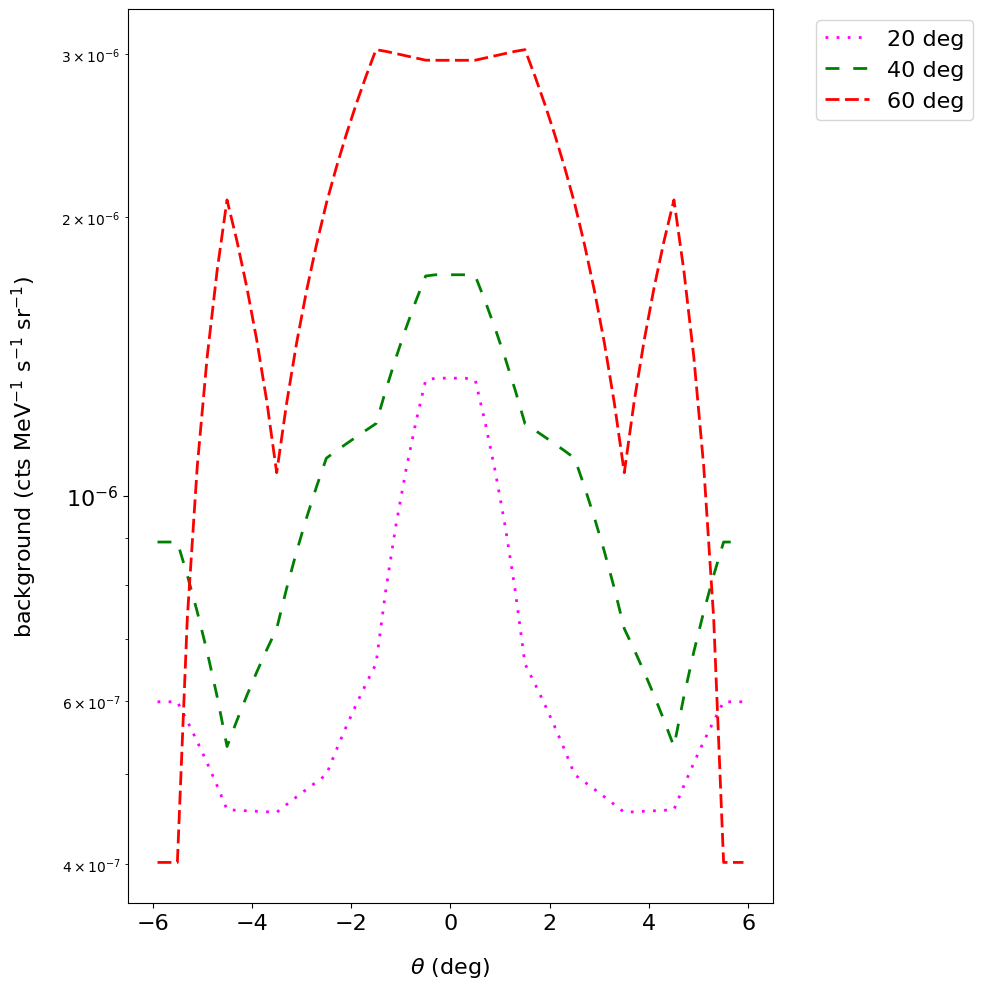

In [191]:
bkg20, x, y, e = get_bkg(f_z20)
bkg40, x, y, e = get_bkg(f_z40)
bkg60, x, y, e = get_bkg(f_z60)
bkg_bins = [0, 4, 9, 14]
en = 14
print(np.round(e[en], 2))

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, yscale='log') 
plt.xticks(fontsize=fontsize, rotation=0)
plt.yticks(fontsize=fontsize, rotation=0)

curve = []
ax.plot(x, bkg20[30,:,en], label='20 deg', ls=linestyle[1], lw=2, color=c[1])
ax.plot(x, bkg40[30,:,en], label='40 deg', ls=linestyle[2], lw=2, color=c[2])
ax.plot(x, bkg60[30,:,en], label='60 deg', ls=linestyle[3], lw=2, color=c[3])
ax.set_xlabel(r'$\theta$ (deg)', fontsize=fontsize, labelpad=fontsize)
ax.set_ylabel('background (cts MeV$^{-1}$ s$^{-1}$ sr$^{-1}$)', fontsize=fontsize, labelpad=fontsize)
ax.legend(fontsize=fontsize, bbox_to_anchor=(1.05, 1.0), loc='upper left') 
plt.tight_layout()
fig.savefig('irfs/bkg_z60_z40_z20_10TeV.png')
plt.show() 
plt.close()

0.5


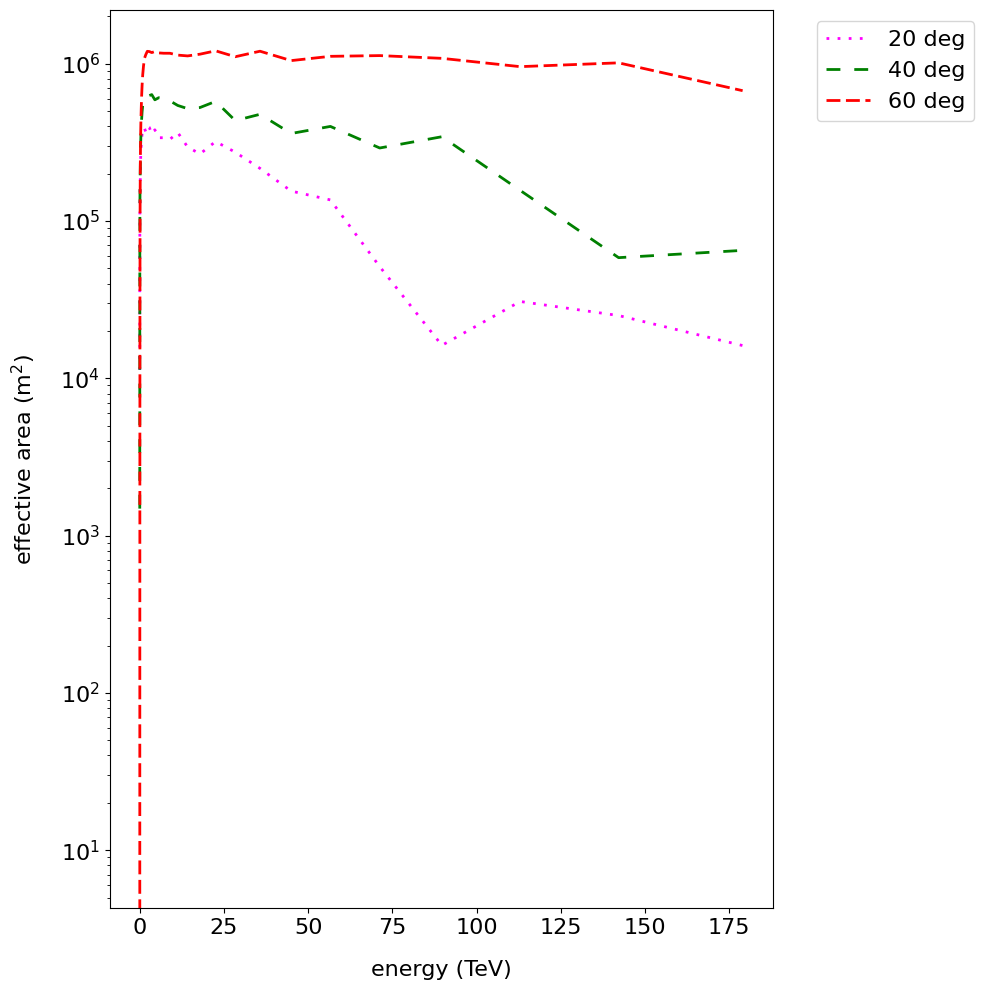

In [204]:
aeff20, theta, e = get_aeff(f_z20)
aeff40, theta, e = get_aeff(f_z40)
aeff60, theta, e = get_aeff(f_z60)

t_bins = [0, 1, 2, 3]
tn = 0
print(np.round(theta[tn], 2))

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, yscale='log') 
plt.xticks(fontsize=fontsize, rotation=0)
plt.yticks(fontsize=fontsize, rotation=0)

ax.plot(e, aeff20[tn,:], label='20 deg', ls=linestyle[1], lw=2, color=c[1])
ax.plot(e, aeff40[tn,:], label='40 deg', ls=linestyle[2], lw=2, color=c[2])
ax.plot(e, aeff60[tn,:], label='60 deg', ls=linestyle[3], lw=2, color=c[3])
ax.set_xlabel(r'energy (TeV)', fontsize=fontsize, labelpad=fontsize)
ax.set_ylabel('effective area (m$^2$)', fontsize=fontsize, labelpad=fontsize)
ax.legend(fontsize=fontsize, bbox_to_anchor=(1.05, 1.0), loc='upper left') 
plt.tight_layout()
fig.savefig(f'irfs/aeff_z60_z40_z20_{tn}deg.png')
plt.show() 
plt.close()

11.29


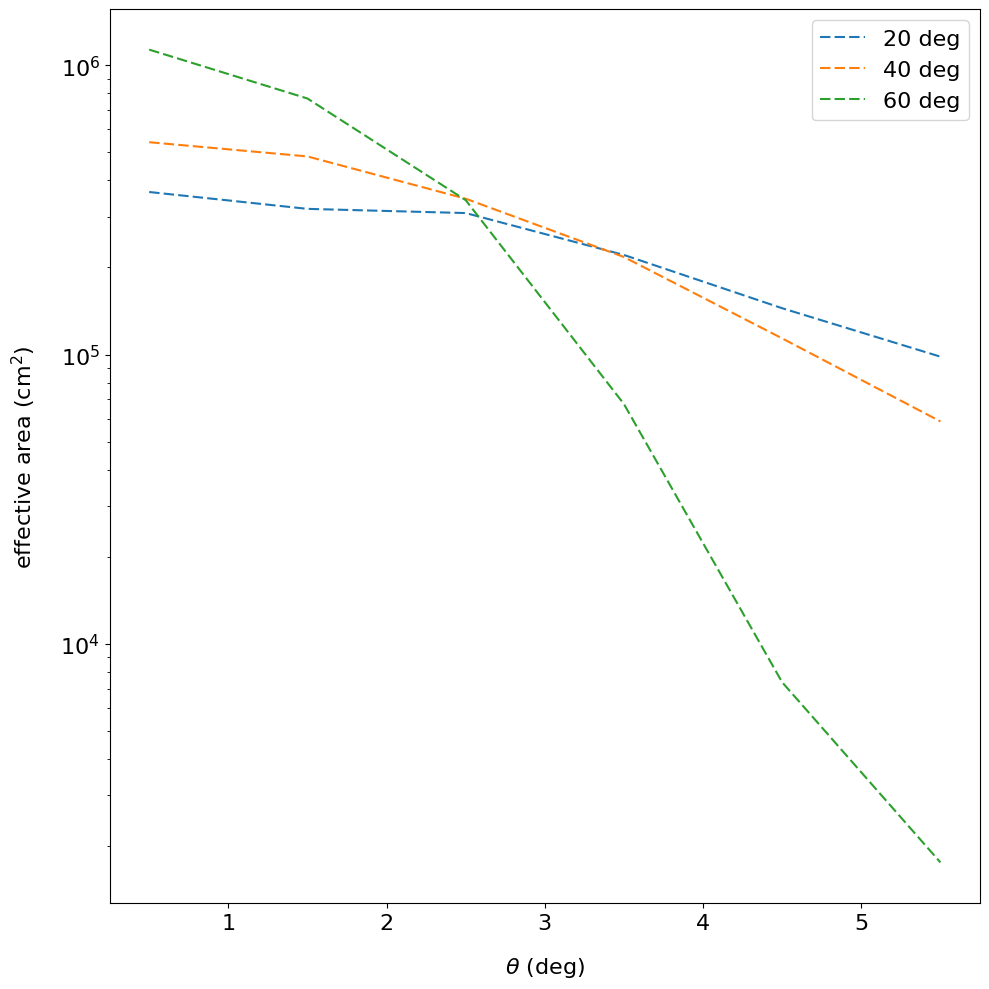

In [215]:
e_bins = [4, 14, 19, 29]
en = 29
print(np.round(e[en], 2))

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, yscale='log') 
plt.xticks(fontsize=fontsize, rotation=0)
plt.yticks(fontsize=fontsize, rotation=0)

ax.plot(theta, aeff20[:,en], label='20 deg', ls=linestyle[i])
ax.plot(theta, aeff40[:,en], label='40 deg', ls=linestyle[i])
ax.plot(theta, aeff60[:,en], label='60 deg', ls=linestyle[i])
ax.set_xlabel(r'$\theta$ (deg)', fontsize=fontsize, labelpad=fontsize)
ax.set_ylabel(r'effective area (cm$^2$)', fontsize=fontsize, labelpad=fontsize)
ax.legend(loc=0, fontsize=fontsize) 
plt.tight_layout()
fig.savefig('irfs/aeff_z60_z40_z20_10TeV.png')
plt.show() 
plt.close()